# Week 6: Logistic Regression and Discriminant Analysis

This week, we cover **logistic regression**, one of the most popular classifiers. Like the other classifiers we have seen, it computes posterior probabilities without assuming the distributions of the classes.

Secondly, we will consider **discriminant analysis**, a powerful family of classifiers that construct so-called **discriminant functions** that specify decision boundaries that determine how points are assigned to classes.

Unlike previously-seen classifiers, these methods do not necessarily require assuming the distribution of the classes.

# Lecture 10: Logistic Regression

In class, we discussed the logistic regression model for both binary classification and multiclass classification.

## Binary Logistic Regression

In this case, we predict binary labels $Y\in\{0, 1\}$. Fitting the model simplifies to minimizing the **binary cross-entropy** loss function

$$L(\theta)=-\sum\limits_{i=1}^n y_i\ln\left(\sigma\left(\theta^Tx_i\right)\right)+(1-y_i)\ln\left(\sigma\left(-\theta^Tx_i\right)\right)$$

where $\theta=(\theta_0, \theta_1, ..., \theta_d)^T$ are parameters of the model and $\sigma:\mathbb{R}\to\mathbb{R}$ is the **logistic** or **sigmoid** function

$$\sigma(z)=\frac{1}{1+e^{-z}}=\frac{e^z}{1+e^z}$$

In class, we showed

$$\frac{\partial L}{\partial\theta}=\sum\limits_{i=1}^n\left(\sigma\left(\theta^Tx\right)-y_i\right)x_i$$

To code logistic regression, let's first import some libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

Next, we implement binary logistic regression.

In [2]:
class BinaryLogisticRegression:        
    def fit(self, X, y, alpha, epochs, eps, update):
        # add a column of 1s to X
        X = np.hstack((np.ones([X.shape[0],1]), X))
            
        # modify y to be n by 1
        y = np.atleast_2d(y).T
        
        # initialize the parameters to 1
        self.theta = np.ones([X.shape[1], 1])
        
        # initialize the step number and theta gradient
        step = 0
        thetagrad = 2 * eps
        
        # minimize cross-entropy -- run until thetagrad is small or step is epochs
        while np.linalg.norm(thetagrad) > eps and step < epochs:
            # compute the loss
            sig = self.sigmoid(X @ self.theta)
            
            if step % update == 0:
                loss = -(1/X.shape[0]) * np.sum(y * np.log(sig + 0.001) + (1 - y) * np.log(1 - sig + 0.001))
                print('Iteration', step, '\tLoss =', loss)
            
            # compute the gradient
            thetagrad = X.T @ (sig - y)
            
            # take a gradient descent step
            self.theta -= alpha * thetagrad
                        
            # iterate the step
            step += 1
            
            if step == epochs:
                print('Gradient descent failed to converge. (The answer may still be acceptably good.)')
            
    def predict(self, X):
        # add a column of 1s to X
        X = np.hstack((np.ones([X.shape[0],1]), X))
        
        # return 0 if the posterior for Y=1 is less than for Y=0
        # otherwise, return 1
        return (self.sigmoid(X @ self.theta) >= 0.5).astype(float)
            
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

### Example: Detecting Breast Cancer with Binary Logistic Regression

Iteration 0 	Loss = 2.7560153177035067


C:\Users\Ryan\AppData\Local\Temp/ipykernel_2720/4107300181.py:46: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Iteration 100000 	Loss = 0.3882261210367881
Iteration 200000 	Loss = 0.6477098686167024
Iteration 300000 	Loss = 0.53418572905049
Iteration 400000 	Loss = 0.30713744991806485
Iteration 500000 	Loss = 0.27470198147057556
Iteration 600000 	Loss = 0.33957291836555414
Iteration 700000 	Loss = 0.27470198147057556
Iteration 800000 	Loss = 0.30713744991806485
Iteration 900000 	Loss = 0.2584842472468309
Gradient descent failed to converge. (The answer may still be acceptably good.)

Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.90      0.86        42
           1       0.96      0.92      0.94       101

    accuracy                           0.92       143
   macro avg       0.89      0.91      0.90       143
weighted avg       0.92      0.92      0.92       143


Confusion Matrix:



<AxesSubplot:>

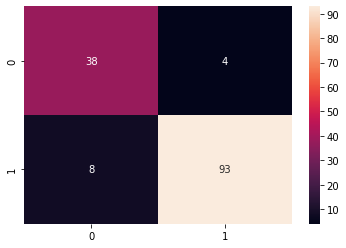

In [3]:
# import the breast cancer dataset
breastcancer = datasets.load_breast_cancer()

# find the data and labels
X = breastcancer.data
Y = breastcancer.target

# split the data into train and test sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25)

# build the classifier
model = BinaryLogisticRegression()

# fit the classifier to the training data
model.fit(trainX, trainY, alpha = 0.01, epochs = 1000000, eps = 0.01, update = 100000)

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nClassification Report:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)

### Example: Detecting Breast Cancer with `LogisticRegression` from `scikit-learn`

The built-in `LogisticRegression` class in `scikit-learn` tends to work a little faster because it uses an optimizer that efficiently uses second derivative information by default. Note that the class uses an $L^2$ penalty if we speciy the variable `C`, where

$$C=\frac{1}{\lambda_2}$$

Tuning this hyperparameter is a good idea to improve performance on the test set.

In [4]:
# import the breast cancer dataset
breastcancer = datasets.load_breast_cancer()

# find the data and labels
X = breastcancer.data
Y = breastcancer.target

# split the data into train and test sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25)

# build the classifier
model = LogisticRegression(C = 10000, max_iter = 10000)

# fit the classifier to the training data
model.fit(trainX, trainY)

# predict the labels of the training set
predictedY = model.predict(trainX)

# print quality metrics
print('\nTraining Classification Report:\n\n', classification_report(trainY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTesting Classification Report:\n\n', classification_report(testY, predictedY))


Training Classification Report:

               precision    recall  f1-score   support

           0       0.99      0.96      0.98       164
           1       0.98      0.99      0.98       262

    accuracy                           0.98       426
   macro avg       0.98      0.98      0.98       426
weighted avg       0.98      0.98      0.98       426


Testing Classification Report:

               precision    recall  f1-score   support

           0       0.90      0.96      0.93        48
           1       0.98      0.95      0.96        95

    accuracy                           0.95       143
   macro avg       0.94      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



## Multiclass Logistic Regression

Logistic regression can also be applied to classification problems with logistic regression. In this case, we predict one-hot vector labels $Y\in\{\mathbf{e}_1, \mathbf{e}_2, ..., \mathbf{e}_k\}$. Fitting the model simplifies to minimizing the **categorical cross-entropy** loss function

$$L(\theta)=-\sum\limits_{i=1}^n\sum\limits_{j=1}^k y_{ij}\ln\left(\sigma\left(\theta^T_j x_i\right)\right)$$

where $\theta_j=(\theta_{j0}, \theta_{j1}, ..., \theta_{jd})^T$ are parameters of the model for $j=1, ..., k$.

In class, we derived the gradient, which can be used in gradient descent as

$$\frac{\partial L}{\partial\theta_l}=\sum\limits_{i=1}^n \left(\pi_l(x_i) - y_{il}\right)x_i=\sum\limits_{i=1}^n\sum\limits_{j=1}^k \left(\sigma\left(\theta^T x_i\right)_l-y_{il}\right)x_i$$

where the **softmax** function $\sigma:\mathbb{R}^k\to\mathbb{R}^k$ is defined in each coordinate as

$$\sigma(z)_i=\frac{e^{z_i}}{\sum\limits_{j=1}^k e^{z_j}}$$

We will simply use the `scikit-learn` class `LogisticRegression` for the multiclass case to avoid some not-so-enlightening code (at least, given that it's just scaling up the binary case).

### Example: Classifying the Iris Dataset with Logistic Regression


Predicted class labels:
 [1 0 2 0 2 0 2 2 1 1 1 2 2 0 2 2 1 1 1 1 0 1 2 1 1 0 2 0 1 1 2 1 2 0 1 0 2
 0]

True class labels:
 [1 0 2 0 2 0 2 2 1 1 1 2 2 0 2 2 2 1 1 1 0 1 2 1 2 0 2 0 1 1 2 1 2 0 1 0 1
 0]

Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.87      0.93      0.90        14
           2       0.92      0.86      0.89        14

    accuracy                           0.92        38
   macro avg       0.93      0.93      0.93        38
weighted avg       0.92      0.92      0.92        38


Confusion Matrix:



<AxesSubplot:>

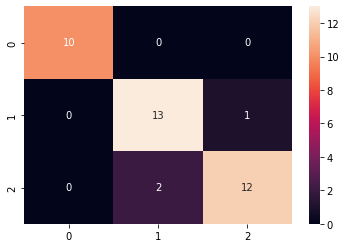

In [5]:
iris = datasets.load_iris()

# find the data and labels
X = iris.data
Y = iris.target

# split the data into train and test sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25)

# build the logistic regression classifier
model = LogisticRegression(max_iter = 10000)

# fit the logistic regression classifier to the training data
model.fit(trainX, trainY)

# predict the labels of the test set
predictedY = model.predict(testX)

# print predicted and true class labels
print('\nPredicted class labels:\n', predictedY)
print('\nTrue class labels:\n', testY)

# print quality metrics
print('\nClassification Report:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)

### Example MNIST Handwritten Digits with Logistic Regression


Training Classification Report:

               precision    recall  f1-score   support

           0       0.97      0.98      0.98      5923
           1       0.96      0.98      0.97      6742
           2       0.94      0.92      0.93      5958
           3       0.92      0.91      0.92      6131
           4       0.94      0.95      0.94      5842
           5       0.91      0.91      0.91      5421
           6       0.96      0.97      0.96      5918
           7       0.95      0.95      0.95      6265
           8       0.91      0.90      0.91      5851
           9       0.92      0.92      0.92      5949

    accuracy                           0.94     60000
   macro avg       0.94      0.94      0.94     60000
weighted avg       0.94      0.94      0.94     60000


Testing Classification Report:

               precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
         

<AxesSubplot:>

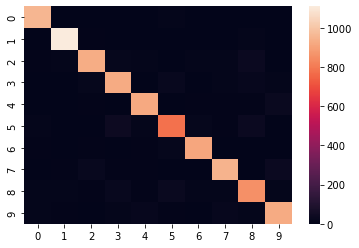

In [6]:
(trainX, trainY), (testX, testY) = mnist.load_data()

# flatten the data to 768-vectors and normalize
trainX = trainX.reshape(trainX.shape[0], trainX.shape[1] * trainX.shape[2])
trainX = trainX.astype('float')/255.0

testX = testX.reshape(testX.shape[0], testX.shape[1] * testX.shape[2])
testX = testX.astype('float')/255.0

# build the classifier
model = LogisticRegression(max_iter = 10000, njobs = -1)

# fit the classifier to the training data
model.fit(trainX, trainY)

# predict the labels of the training set
predictedY = model.predict(trainX)

# print quality metrics
print('\nTraining Classification Report:\n\n', classification_report(trainY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTesting Classification Report:\n\n', classification_report(testY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

print('\nTesting Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY))

We see 93% accuracy on the test set with zero hyperparameter tuning!

# Lecture 11: Fisher's LDA

(see the class notes in Canvas)